<a href="https://www.kaggle.com/code/hanpat99/assignment-3?scriptVersionId=127255976" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [29]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import style
from scipy import stats
%matplotlib inline

# Problem Statement 

### Using the waiter’s tip data set, perform the following analysis to understand what how tips to waiter is influenced by various parameters 

* Dataset Description 
* Filename: tips.csv 
* Description for individual columns are listed below 
* total_bill: bill in dollars 
* tip: tip in dollars 
* sex: gender of the bill payer 
* smoker: whether there were smokers in the party 
* day: day of the week 
* time: time of day 
* size: size of the party 

#### Questions

 

#### 1. Calculate average tip by the following groups and visualize the same using bar charts (use subplots) 

* Gender,  

* Size of the party 

* Smoker vs Non-Smoker 

* Day of the week 

In [30]:
print(plt.style.available)
plt.style.use('seaborn-muted') 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


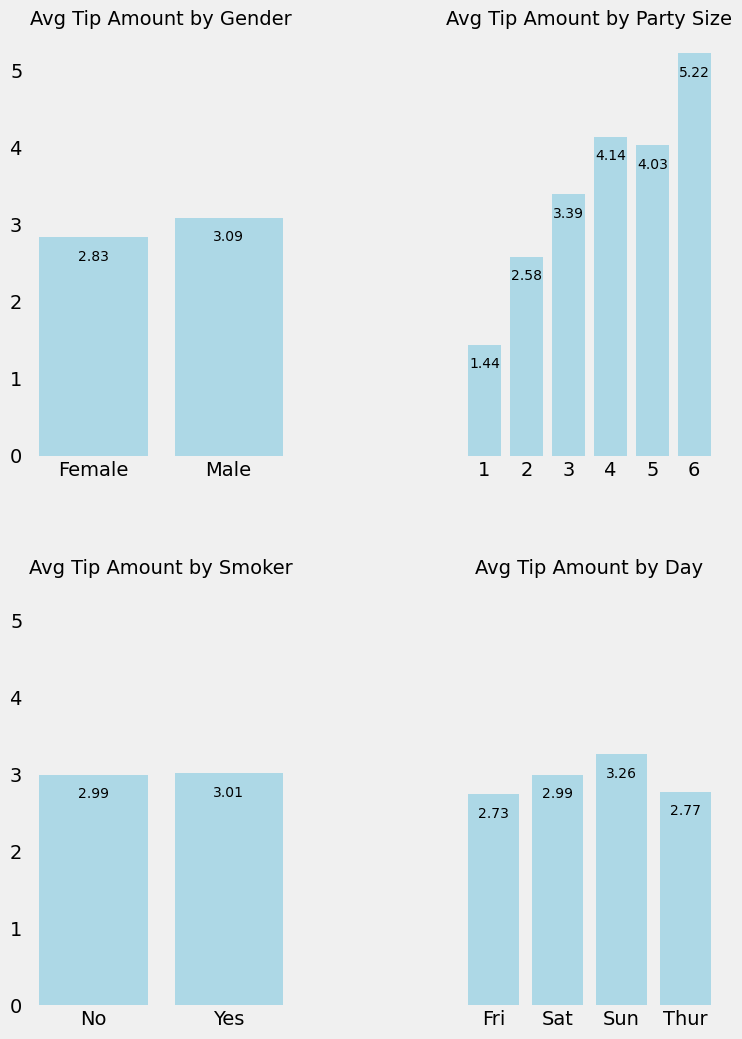

In [52]:
#load dataset
tips = pd.read_csv('/kaggle/input/tips-assignment/tips.csv')

#prepare data
gender = tips.groupby('sex')['tip'].mean()
size = tips.groupby('size')['tip'].mean()
smoker = tips.groupby('smoker')['tip'].mean()
day = tips.groupby('day')['tip'].mean()
size.index = size.index.astype('str')

#axes for subplots
#axes for subplots
fig, ((ax00, ax01),(ax10, ax11)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 12), sharey=True)
ax = [ax00, ax01, ax10, ax11]

ax_titles = ["Gender","Party Size", "Smoker", "Day"]
dfs = [gender, size, smoker, day]

for idx, (df, ax_title) in enumerate(zip(dfs, ax_titles)):
    ax[idx].bar(df.index, df.values, width = 0.8, color = 'lightblue')   
    ax[idx].set_title('Avg Tip Amount by '+ ax_title, fontsize=14)
    
    #styling and dejunkifying the chart
    for i, v in enumerate(df.values):
        ax[idx].text(i, v-0.3, f"{v:.2f}", ha='center', fontsize=10)    
    for spine in ax[idx].spines.values():
        spine.set_visible(False)
    ax[idx].grid(visible=False)    
#adjust spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace = 0.6)

plt.show()

#### 2. Create box plot for tip amount column. Split the box plot by above mentioned categories (use subplots) 

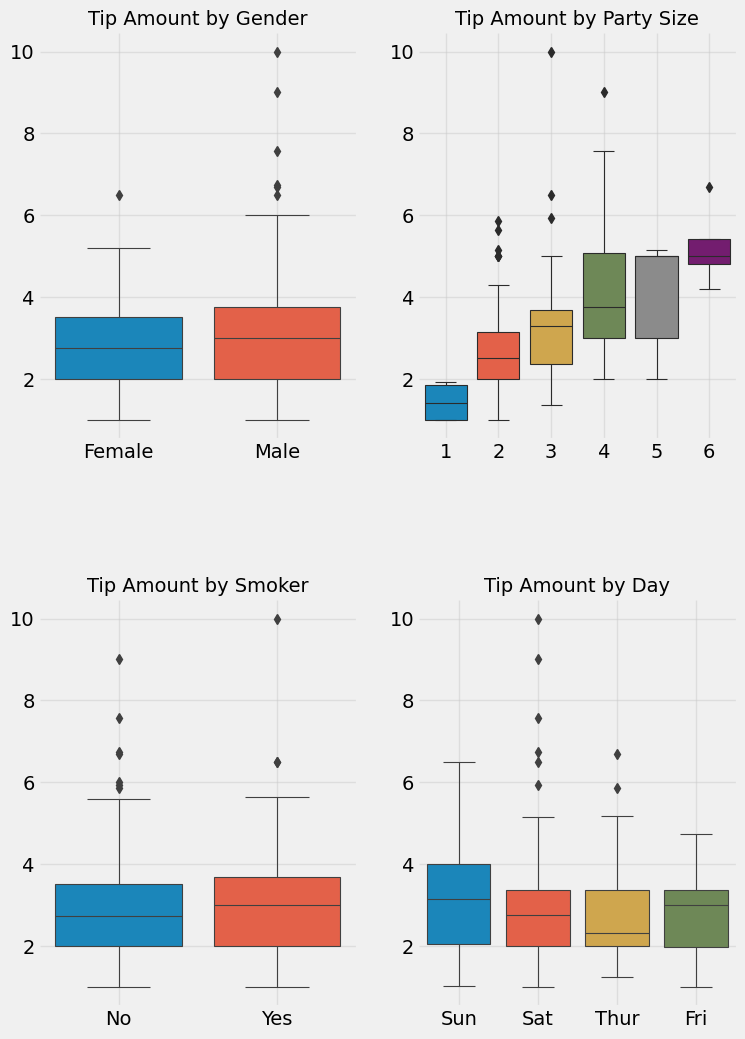

In [61]:
#axes for subplots
fig, ((ax00, ax01),(ax10, ax11)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 12))

ax = [ax00, ax01, ax10, ax11]
ax_titles = ["Gender","Party Size", "Smoker", "Day"]
X = ['sex', 'size', 'smoker', 'day']
Y = 'tip'

for idx, (X, ax_title) in enumerate(zip(X, ax_titles)):
    sns.boxplot(x=X, y=Y, data=tips, ax=ax[idx], linewidth=0.8)
    
    #styling and dejunkifying the chart
    ax[idx].set_xlabel('')
    ax[idx].set_ylabel('')
    ax[idx].set_title('Tip Amount by '+ ax_title, fontsize=14)
    for spine in ax[idx].spines.values():
        spine.set_linewidth(0.2)
    ax[idx].grid(alpha=0.5)
    
# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.4) 

# Show the plot
plt.show()


#### 3. Using the above bar charts & box plots, identify which group influences the tip amount the most 

##### Inferences:

> 1. From preliminary observation of bar and histogram of Average Tip Amounts vs Groups, its apparent that **Party sizes**, with **large Inter-Quartile Ranges** and **increasing trends** are more influential on tip sizes over other variables.

> 2. We will explore the effect of groups within the 4 variables further with one-way ANOVA tests. 

In [33]:
gender = tips.groupby('sex')
size = tips.groupby('size')
smoker = tips.groupby('smoker')
day = tips.groupby('day')

size_fval, size_pval = stats.f_oneway(size.get_group(6)['tip'], size.get_group(1)['tip'])
gender_fval, gender_pval = stats.f_oneway(gender.get_group('Male')['tip'], gender.get_group('Female')['tip'])
smoker_fval, smoker_pval = stats.f_oneway(smoker.get_group('No')['tip'], smoker.get_group('Yes')['tip'])
day_fval, day_pval = stats.f_oneway(day.get_group('Sun')['tip'], day.get_group('Thur')['tip'])

pd.DataFrame({'Size ANOVA':(size_fval, size_pval),\
    'Gender ANOVA':(gender_fval, gender_pval),\
    'Smoker ANOVA':(smoker_fval, smoker_pval),\
    'Day ANOVA':(day_fval, day_pval)}, 
             index = ['f-value', 'p-value'])

,Size ANOVA,Gender ANOVA,Smoker ANOVA,Day ANOVA
f-value,42.014772,1.926155,0.008506,5.218031
p-value,0.000641,0.166456,0.926593,0.023903


>3.  Within the four variables considered, **Day of the week** and **Party Size** have a considerable influence on the tip amounts, form observing the **lower p-values (<0.05).** However, the **higher f-value of the Party-size** suggests thats the variance of means between its groups is higher and hence **its influence is strongest on Tip-sizes.**

> 

#### 4. Visualize the relationship between total bill amount vs tip amount using scatter plot. The metric of interest should always be in the Y-axis. Here we are interested in understanding the tip pattern. Hence Y-axis should be tip amount and X axis should be total bill

In [34]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

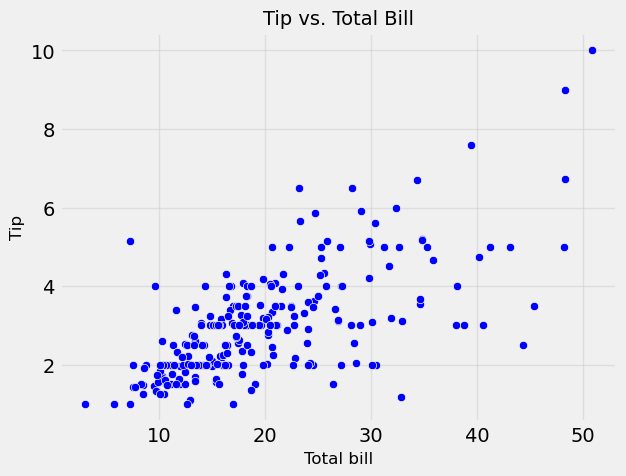

In [65]:
# Use regplot to create a scatter plot with a linear regression line
sns.scatterplot(x=tips.total_bill, y=tips.tip, color = 'blue')

plt.xlabel("Total bill",fontsize=12)
plt.ylabel("Tip",fontsize=12)
plt.title("Tip vs. Total Bill", fontsize=14)
plt.grid(alpha=0.5)
plt.show()

In [36]:
tips.corr().iloc[0,1]

0.6757341092113648

In [37]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000



#### 5. Based on the above scatter plot, what do you think the waiter will do. Will he/she make you eat more or less to get good tip? 

> From the above acatterplot, it is highly likely that the **waiter will make a customer eat more** to get a good tip.


#### 6. Substantiate your above inference through appropriate statistical test 

In [38]:
corr, pval = stats.pearsonr(tips.total_bill, tips.tip)
print(f'A positive, linear relationship between Total-bill and the Tip Amount can be established through the correlation coefficient, {corr}')

A positive, linear relationship between Total-bill and the Tip Amount can be established through the correlation coefficient, 0.6757341092113647


#### 7. In the above scatter plot, color each circle by gender and list down your inferences 

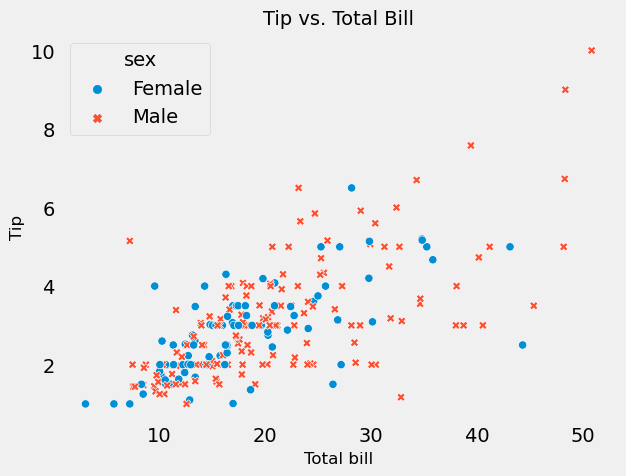

In [64]:
plt.style.use('fivethirtyeight')

sns.scatterplot(x="total_bill", y="tip", hue="sex", style="sex", data=tips)

# Add labels and title to the plot
plt.xlabel("Total bill", fontsize=12)
plt.ylabel("Tip", fontsize=12)
plt.title("Tip vs. Total Bill", fontsize=14)

plt.grid(visible=False)

plt.show()


##### Inferences 

1. The above acatterplot shows men and women tipping the same amounts on an average.

2. For higher bill amounts (>30), men tended to tip higher than women.

3. For lower bill amounts (< 20), men and women tended to tip similarly.